## Transfer Learning Inception V3 

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Import Libraries

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [9]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/data-20220326T192727Z-001/data/train'
valid_path = '/content/drive/MyDrive/Dataset/data-20220326T192727Z-001/data/val'

In [11]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [12]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [13]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/data-20220326T192727Z-001/data/train/*')

In [14]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [16]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [20]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
61/61 [==============================] - 758s 12s/step - loss: 3.2804 - accuracy: 0.7273 - val_loss: 0.5549 - val_accuracy: 0.8827
Epoch 2/20
61/61 [==============================] - 259s 4s/step - loss: 0.6412 - accuracy: 0.8893 - val_loss: 0.3664 - val_accuracy: 0.9012
Epoch 3/20
61/61 [==============================] - 261s 4s/step - loss: 0.4650 - accuracy: 0.9031 - val_loss: 0.6669 - val_accuracy: 0.8796
Epoch 4/20
61/61 [==============================] - 268s 4s/step - loss: 0.6243 - accuracy: 0.8934 - val_loss: 0.5106 - val_accuracy: 0.9043
Epoch 5/20
61/61 [==============================] - 261s 4s/step - loss: 0.5851 - accuracy: 0.9113 - val_loss: 0.4139 - val_accuracy: 0.9352
Epoch 6/20
61/61 [==============================] - 261s 4s/step - loss: 0.5163 - accuracy: 0.9303 - val_loss: 0.7481 - val_accuracy: 0.9105
Epoch 7/20
61/61 [==============================] - 260s 4s/step - loss: 0.6142 - accuracy: 0.9221 - val_loss: 0.9791 - val_accuracy: 0.8858
Epoch 8/20
6

In [22]:
import matplotlib.pyplot as plt

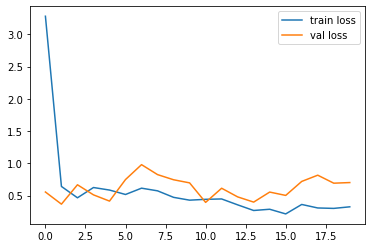

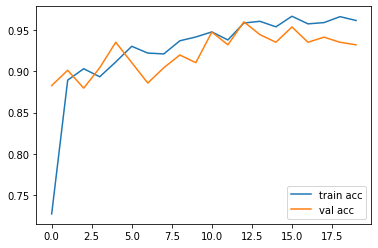

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_inceptionV3.h5')

In [26]:
y_pred = model.predict(test_set)

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model=load_model('model_inceptionV3.h5')

In [74]:
img=image.load_img('/content/drive/MyDrive/Dataset/data-20220326T192727Z-001/data/test/diseased cotton plant/dd (706).jpg',target_size=(224,224))

In [75]:
x=image.img_to_array(img)
x

array([[[226., 212., 123.],
        [195., 181.,  93.],
        [189., 175.,  87.],
        ...,
        [ 99., 160.,  23.],
        [131., 192.,  52.],
        [108., 165.,  32.]],

       [[217., 202., 121.],
        [209., 194., 101.],
        [194., 179.,  88.],
        ...,
        [112., 172.,  38.],
        [ 86., 147.,   7.],
        [109., 170.,  30.]],

       [[180., 175.,  94.],
        [187., 172.,  79.],
        [234., 214., 127.],
        ...,
        [ 97., 161.,  23.],
        [112., 177.,  33.],
        [115., 180.,  36.]],

       ...,

       [[ 82.,  69.,  35.],
        [ 77.,  65.,  27.],
        [ 84.,  72.,  34.],
        ...,
        [133., 198.,  36.],
        [135., 200.,  38.],
        [145., 211.,  43.]],

       [[ 82.,  66.,  30.],
        [ 87.,  72.,  33.],
        [ 82.,  66.,  30.],
        ...,
        [132., 194.,  35.],
        [121., 186.,  24.],
        [130., 192.,  33.]],

       [[ 87.,  71.,  35.],
        [ 85.,  69.,  33.],
        [ 83.,  

In [76]:
x.shape

(224, 224, 3)

In [77]:
x=x/255

In [78]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [79]:
model.predict(img_data)

array([[9.9999011e-01, 1.6377639e-07, 1.3218164e-07, 9.6902622e-06]],
      dtype=float32)

#### First class denotes diseased cotton leaf.
#### Second class denotes diseased cotton plant.
#### Third class denotes fresh cotton leaf.
#### Fourt class denotes fresh cotton plant.

In [80]:
a=np.argmax(model.predict(img_data), axis=1)

In [81]:
a

array([0])

In [82]:
a==1

array([False])